# Imports

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import datetime
import os, sys
import time
import pandas as pd

from matplotlib.pyplot import imshow, imsave
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import shutil

from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/GANs/collect_into_one_architecture'

drive.mount('/content/gdrive', force_remount=True)
os.chdir(gdrive_path)
print(sorted(os.listdir()))


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/gdrive
['Changing_batchnorm_True.ipynb', 'Changing_betas.ipynb', 'Changing_clip_values.ipynb', 'Changing_disc_iter.ipynb', 'Changing_gradient_penalty.ipynb', 'Changing_learning_rates.ipynb', 'Result-Plots.ipynb', '__pycache__', 'data', 'files', 'functions.py', 'functions_for_batchnorm.py', 'generated_images', 'real_images', 'results']


In [ ]:
from functions_for_batchnorm import *

In [ ]:
values = pd.read_csv("files/values_of_some_hyperparams.csv")
values

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,model_name,n_noise,batch_size,n_critic,max_epochs,clip_value,best_lr,best_beta,penalty
0,0,0,0,0,0,WGAN,100,128,1,35,0.01,0.001,0.9,NaN
1,1,1,1,1,1,WGAN_GP,100,128,2,33,NaN,0.001,0.9,10.0
2,2,2,2,2,2,LSGAN,100,128,1,20,NaN,0.001,0.9,NaN
3,3,3,3,3,3,Vanilla_GAN,100,128,2,20,NaN,0.001,0.9,NaN


In [ ]:
def run(MODEL_NAME, lrs, batch_size, n_critic, max_epoch, clip_value, n_noise, threshold, beta, random_seed = True):
  
  time_to_finish = []
  root1 = f"results/models/batchnorm_True/{MODEL_NAME}/"
  root2 = f"results/imgs/batchnorm_True/{MODEL_NAME}/"
  start_time = time.time()
  path_model = root1 + "batchnorm_True"
  path_img = root2 + "batchnorm_True"

  if os.path.exists(path_img):
    shutil.rmtree(path_img)
    print(f"Removed {path_img}")
    os.mkdir(path_img)
  else:
    os.mkdir(path_img)
  
  if os.path.exists(path_model):
    shutil.rmtree(path_model)
    print(f"Removed {path_model}")
    os.mkdir(path_model)

  else:
    os.mkdir(path_model)
  print(path_model)
  print(path_img)
  print("*"*30)
  print("\n Batchnorm True!")
  if MODEL_NAME == "Vanilla_GAN":
    train_Vanilla_GAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed, 
              threshold = threshold, beta=beta)
  elif MODEL_NAME == "LSGAN":
    train_LSGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
            threshold = threshold, beta=beta)
  elif  MODEL_NAME == "WGAN":
    train_WGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, clip_value = clip_value, n_noise = n_noise,
            random_seed = random_seed, threshold = threshold, beta=beta)
  elif MODEL_NAME == "WGAN_GP":
    train_WGAN_GP(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
            threshold = threshold, beta=beta)
  end_time = time.time()
  
  print("*"*30)
  time_to_finish.append(end_time - start_time)
  print("RUN TIME: ", time_to_finish)

  result_time = pd.DataFrame()
  result_time["time"] = time_to_finish
  result_time["batchnorm_True"] = 1
  result_time["batchnorm_True"] = result_time["batchnorm_True"].astype('str')
  result_time.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_runing_times.csv")

# GANs Comparative Analysis

# Batchnorm Analysis

## Vanilla GAN


In [ ]:
MODEL_NAME = values[values.model_name=="Vanilla_GAN"].model_name.values[0]
n_noise = values[values.model_name=="Vanilla_GAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="Vanilla_GAN"].batch_size.values[0])
n_critic = values[values.model_name=="Vanilla_GAN"].n_critic.values[0]
max_epoch = values[values.model_name=="Vanilla_GAN"].max_epochs.values[0]
clip_value = values[values.model_name=="Vanilla_GAN"].clip_value.values[0]
lr = values[values.model_name=="Vanilla_GAN"].best_lr.values[0]
beta = values[values.model_name=="Vanilla_GAN"].best_beta.values[0]


In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = 0.27502931836911926)

In [ ]:
print(f"{MODEL_NAME} batchnorm True")
plot_f1_precison_recall(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

Vanilla_GAN batchnorm True


Vanilla_GAN, batchnorm True


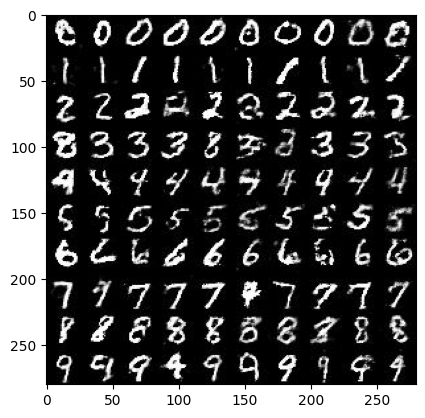

In [ ]:
print(f"{MODEL_NAME}, batchnorm True")
path = f"results/imgs/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# LSGAN

In [ ]:
MODEL_NAME = values[values.model_name=="LSGAN"].model_name.values[0]
n_noise = values[values.model_name=="LSGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="LSGAN"].batch_size.values[0])
n_critic = values[values.model_name=="LSGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="LSGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="LSGAN"].clip_value.values[0]
lr = values[values.model_name=="LSGAN"].best_lr.values[0]
beta = values[values.model_name=="LSGAN"].best_beta.values[0]


In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   # beta = 0.6394267984578837)
#   beta = beta)

In [ ]:
print(f"{MODEL_NAME} batchnorm True")
plot_f1_precison_recall(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

LSGAN batchnorm True


LSGAN, batchnorm True


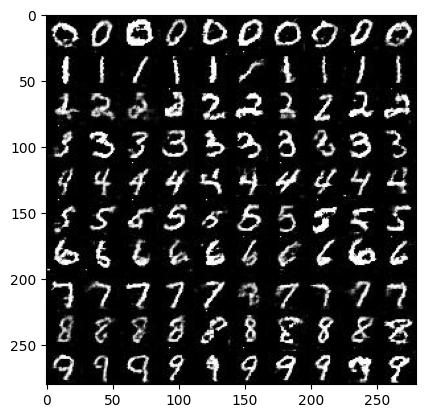

In [ ]:
print(f"{MODEL_NAME}, batchnorm True")
path = f"results/imgs/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# WGAN GP

In [ ]:
MODEL_NAME = values[values.model_name=="WGAN_GP"].model_name.values[0]
n_noise = values[values.model_name=="WGAN_GP"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN_GP"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN_GP"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN_GP"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN_GP"].clip_value.values[0]
lr = values[values.model_name=="WGAN_GP"].best_lr.values[0]
beta = values[values.model_name=="WGAN_GP"].best_beta.values[0]


results/models/batchnorm_True/WGAN_GP/batchnorm_True
results/imgs/batchnorm_True/WGAN_GP/batchnorm_True
******************************

 Batchnorm True!
Starting the training WGAN_GP
Batch size = 128, learning rate = 0.001
Beta = 0.7364712141640124
Gradient Penalty = 10
N critic = 2, N epochs = 33, Random Seed = True, Threshold = 0.5
Step: 50, D Loss: 5.016438961029053, G Loss: -0.1458277404308319
Step: 100, D Loss: 2.4975545406341553, G Loss: 0.9582647085189819
Step: 150, D Loss: -3.8266656398773193, G Loss: 1.901488184928894
Step: 200, D Loss: 3.4902727603912354, G Loss: -2.15828537940979
Step: 250, D Loss: -4.019479751586914, G Loss: 2.8104610443115234
Step: 300, D Loss: -1.2290345430374146, G Loss: 1.0987486839294434
Step: 350, D Loss: -2.7224268913269043, G Loss: 0.5148924589157104
Step: 400, D Loss: -2.0211451053619385, G Loss: 0.6659594774246216
Step: 450, D Loss: -0.08485221862792969, G Loss: 1.3576593399047852
Epoch: 0/33, D Loss: -1.3975151777267456, G Loss: 0.680420696735382

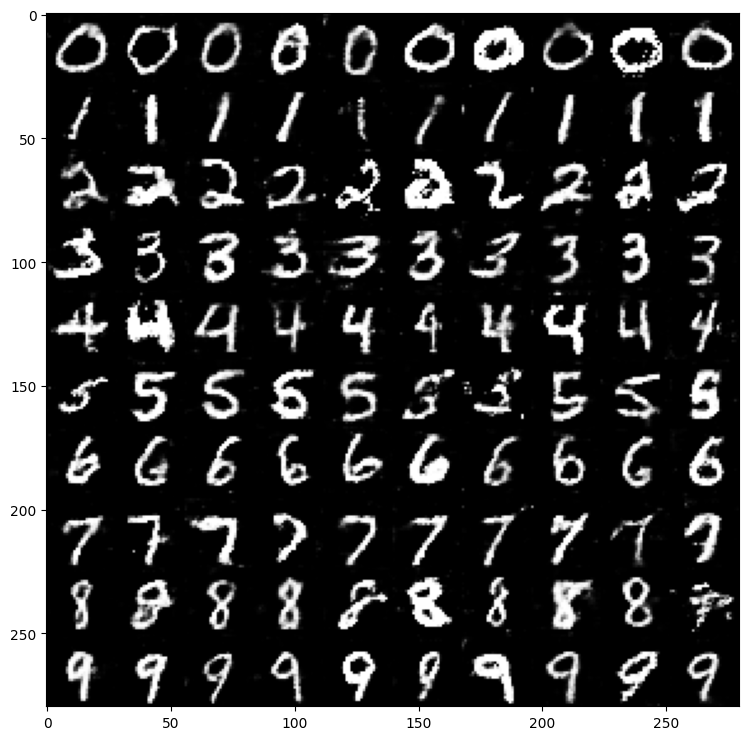

In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = 0.7364712141640124
# )

In [ ]:
print(f"{MODEL_NAME} batchnorm True")
plot_f1_precison_recall(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

WGAN_GP batchnorm True


WGAN_GP, batchnorm True


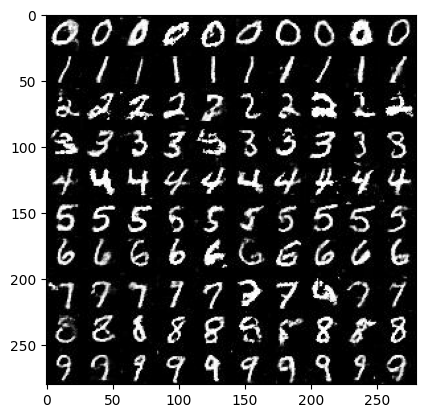

In [ ]:
print(f"{MODEL_NAME}, batchnorm True")
path = f"results/imgs/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# WGAN

In [ ]:
MODEL_NAME = values[values.model_name=="WGAN"].model_name.values[0]
n_noise = values[values.model_name=="WGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN"].clip_value.values[0]
lr = values[values.model_name=="WGAN"].best_lr.values[0]
beta = values[values.model_name=="WGAN"].best_beta.values[0]


Removed results/imgs/batchnorm_True/WGAN/batchnorm_True
Removed results/models/batchnorm_True/WGAN/batchnorm_True
results/models/batchnorm_True/WGAN/batchnorm_True
results/imgs/batchnorm_True/WGAN/batchnorm_True
******************************

 Batchnorm True!
Starting the training WGAN
Batch size = 128, learning rate = 0.001
Beta = 0.025010755222666936
N critic = 1, N epochs = 35, Random Seed = True, Threshold = 0.5
Step: 50, D Loss: -2.3502492904663086, G Loss: 0.8943133354187012
Step: 100, D Loss: -4.067707061767578, G Loss: 1.8028093576431274
Step: 150, D Loss: 0.24982285499572754, G Loss: 0.08597137778997421
Step: 200, D Loss: -0.722728431224823, G Loss: -0.33222442865371704
Step: 250, D Loss: -0.2501179575920105, G Loss: -0.7582255601882935
Step: 300, D Loss: -0.019912242889404297, G Loss: -0.2301415205001831
Step: 350, D Loss: -0.46490025520324707, G Loss: -0.10554297268390656
Step: 400, D Loss: -0.2853637933731079, G Loss: -0.2844568192958832
Step: 450, D Loss: 0.14297437667846

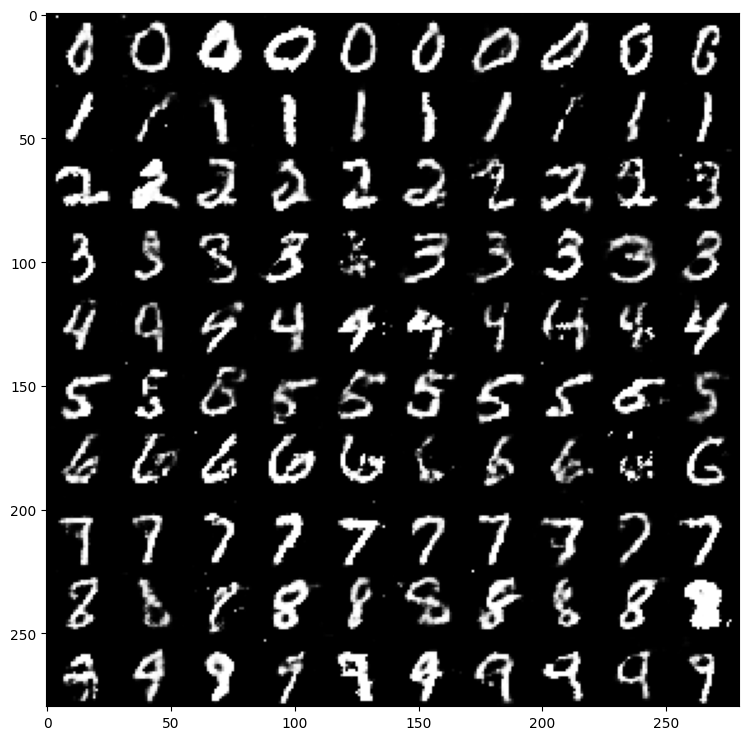

In [ ]:

# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = 0.025010755222666936)

In [ ]:
print(f"{MODEL_NAME} batchnorm True")
plot_f1_precison_recall(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

WGAN batchnorm True


WGAN, batchnorm True


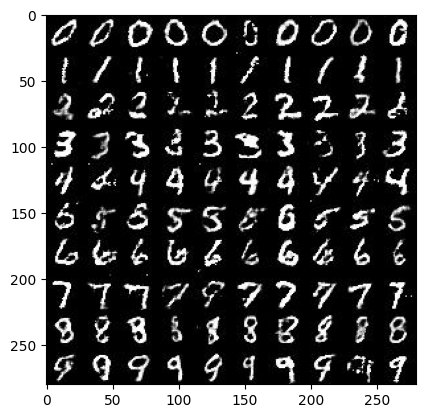

In [ ]:
print(f"{MODEL_NAME}, batchnorm True")
path = f"results/imgs/batchnorm_True/{MODEL_NAME}/batchnorm_True/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# FID SCORE

## VANILLA GAN

In [ ]:
MODEL_NAME = "Vanilla_GAN"

path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
model_path = f"results/models/batchnorm_True/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [ ]:
fid_scores = []
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_True"] = 1
fid_df.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_FID_scores_vs_bn_t.csv")
fid_df

generated_images/batchnorm_True/Vanilla_GAN/batchnorm_True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 98.56193002035693


,fid_score,model_name,batchnorm_True
0,98.56193,Vanilla_GAN,1


## LSGAN

In [ ]:
MODEL_NAME = "LSGAN"
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
model_path = f"results/models/batchnorm_True/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    
    

In [ ]:
fid_scores = []
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_True"] = 1
fid_df.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_FID_scores_vs_bn_t.csv")
fid_df

generated_images/batchnorm_True/LSGAN/batchnorm_True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 96.31878994358362


,fid_score,model_name,batchnorm_True
0,96.31879,LSGAN,1


## WGAN

In [ ]:
MODEL_NAME = "WGAN"
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
model_path = f"results/models/batchnorm_True/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    
    

In [ ]:
fid_scores = []
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_True"] = 1
fid_df.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_FID_scores_vs_bn_t.csv")
fid_df

generated_images/batchnorm_True/WGAN/batchnorm_True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 88.42282845840532


,fid_score,model_name,batchnorm_True
0,88.422828,WGAN,1


## WGAN GP

In [ ]:
MODEL_NAME = "WGAN_GP"
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
model_path = f"results/models/batchnorm_True/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [ ]:
fid_scores = []
path = f"generated_images/batchnorm_True/{MODEL_NAME}/"
add = "batchnorm_True"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_True"] = 1
fid_df.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_FID_scores_vs_bn_t.csv")
fid_df

generated_images/batchnorm_True/WGAN_GP/batchnorm_True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 81.61281358305038


,fid_score,model_name,batchnorm_True
0,81.612814,WGAN_GP,1


# Bachnorm True VS Loss

In [ ]:
# # load model
def load_model(path, n_noise):

  D = Discriminator().to(DEVICE)
  G = Generator(n_noise).to(DEVICE)
#   D_opt = torch.optim.Adam(D.parameters(), lr=learning_rate, betas=(0., 0.9)) ## may change
#   G_opt = torch.optim.Adam(G.parameters(), lr=learning_rate, betas=(0., 0.9)) ## may change


  checkpoint = torch.load(f"{path}/model.tar")

  G.load_state_dict(checkpoint['G_state_dict'])
  D.load_state_dict(checkpoint['D_state_dict'])

  # D_opt.load_state_dict(checkpoint['g_optimizer_state_dict'])
  # D_opt.load_state_dict(checkpoint['d_optimizer_state_dict'])
  # eval(G)

  

  D_loss = checkpoint['D_loss']
  G_loss = checkpoint['G_loss']
  return G_loss, D_loss
beta

In [ ]:
def load_model_and_results(MODEL_NAME):
  trained_bns = os.listdir(f"results/models/batchnorm_True/{MODEL_NAME}/")
  root = f"results/models/batchnorm_True/{MODEL_NAME}/batchnorm_True/"
  G_loss_list = []
  D_loss_list = []



  print(f"Batchnorm True")
  path = root 

  G_loss, D_loss = load_model(path, n_noise)
  G_loss_list.append(G_loss.item())
  D_loss_list.append(D_loss.item())

  print("D = ",D_loss.item(), "G = ",G_loss.item())

  result_loss = pd.DataFrame()
  result_loss["D_loss"] = D_loss_list
  result_loss["G_loss"] = G_loss_list
  result_loss["batchnorm_true"] = 1
  result_loss["batchnorm_true"] = result_loss["batchnorm_true"].astype('str')
  result_loss['size'] = 5
  result_loss.to_csv(f"results/models/batchnorm_True/{MODEL_NAME}_loss_values.csv")
  print(result_loss)


  fig = make_subplots(rows=1, cols=2)

  fig.add_trace(px.scatter(result_loss, x="batchnorm_true", y="D_loss",  size="size").data[0], row=1, col=1)
  fig.add_trace(px.scatter(result_loss, x="batchnorm_true", y="G_loss",  size="size").data[0], row=1, col=2)
  fig.update_layout(title="Loss vs Batchnorm True", 
                    xaxis=dict(title="BatchNorm"),
                    yaxis=dict(title="Loss"))

  fig.show()

  result_time = pd.read_csv(f"results/models/batchnorm_True/{MODEL_NAME}_runing_times.csv")
  result_time["size"] = 5
  
  print(result_time)

  fig = px.scatter(result_time, x="batchnorm_True", y="time", color="batchnorm_True", size="size", title = "run time vs Batchnorm True")
  fig.show()  

### Vanilla GAN

In [ ]:
load_model_and_results("Vanilla_GAN")

Batchnorm True
D =  1.361952543258667 G =  0.7925996780395508
     D_loss  G_loss batchnorm_true  size
0  1.361953  0.7926              1     5


   Unnamed: 0         time  batchnorm_True  size
0           0  1253.561535               1     5


### LSGAN

In [ ]:
load_model_and_results("LSGAN")

Batchnorm True
D =  0.0793369710445404 G =  1.0759429931640625
     D_loss    G_loss batchnorm_true  size
0  0.079337  1.075943              1     5


   Unnamed: 0         time  batchnorm_True  size
0           0  1432.376534               1     5


### WGAN


In [ ]:
load_model_and_results("WGAN")


Batchnorm True
D =  -0.00015473365783691406 G =  -0.43784070014953613
     D_loss    G_loss batchnorm_true  size
0 -0.000155 -0.437841              1     5


   Unnamed: 0         time  batchnorm_True  size
0           0  2704.872102               1     5


### WGAN_GP


In [ ]:
load_model_and_results("WGAN_GP")


Batchnorm True
D =  -0.042048171162605286 G =  -17.020694732666016
     D_loss     G_loss batchnorm_true  size
0 -0.042048 -17.020695              1     5


   Unnamed: 0        time  batchnorm_True  size
0           0  3433.05366               1     5
